# Lotofácil
Segundo a caixa loterias:
A Lotofácil é, como o próprio nome diz, fácil de apostar e principalmente de ganhar. Você marca entre 15 e 20 números, dentre os 25 disponíveis no volante, e fatura prêmio se acertar 11, 12, 13, 14 ou 15 números. Pode ainda deixar que o sistema escolha os números para você por meio da Surpresinha, ou concorrer com a mesma aposta por 3, 6, 12, 18 ou 24 concursos consecutivos através da Teimosinha.

[Mais informações](https://loterias.caixa.gov.br/Paginas/Lotofacil.aspx)

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from decimal import Decimal
import re
import random
import unidecode
import math
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [55]:
import warnings
warnings.filterwarnings('ignore')

# Probabilidade de ganhar
Primeiro usaremos análise combinatória para identificar a quantidade de possibilidades para cada prêmio

Cn,p = n!/(p!*(n - p)!)

In [2]:
def get_combination(n, p):
    return math.factorial(n)/(math.factorial(p)*math.factorial(n - p))

In [3]:
win_prize_combinations = []
combination_great_prize = get_combination(25, 15)
win_prize_combinations.append((15, combination_great_prize))
for i in range(11, 15):
    print(f'{i} = {get_combination(15, i)} * {get_combination(10, 15 - i)} / {combination_great_prize}')
    combination = combination_great_prize / (get_combination(15, i) * get_combination(10, 15 - i))
    win_prize_combinations.insert(0,(i, combination))
    
    print(f'Combinações com {i} = {combination}')

11 = 1365.0 * 210.0 / 3268760.0
Combinações com 11 = 11.403314146171288
12 = 455.0 * 120.0 / 3268760.0
Combinações com 12 = 59.867399267399264
13 = 105.0 * 45.0 / 3268760.0
Combinações com 13 = 691.8010582010583
14 = 15.0 * 10.0 / 3268760.0
Combinações com 14 = 21791.733333333334


Em um fenômeno aleatórios, as possibilidades da ocorrência de um evento são igualmente prováveis

Então descobriremos a probabilidade de ganhar um prêmio.

P = N(F) / N(P)

P    = Probabilidade do evento ocorrer
N(F) = Número de casos favoráveis
N(P) = Número de casos possíveis

In [4]:
def calc_proba(n_events, n_possibilities):
    return (n_events / n_possibilities) * 100

In [5]:
win_prize_proba = []
for n_hits, n_possibilities in win_prize_combinations:
    proba = Decimal(calc_proba(1, n_possibilities))
    win_prize_proba.append((n_hits, proba))
    
    print(f'Probabilidade de acertar {n_hits} = {proba}')

Probabilidade de acertar 14 = 0.004588896095155350039751507296159616089425981044769287109375
Probabilidade de acertar 13 = 0.1445502269973934772462342834842274896800518035888671875
Probabilidade de acertar 12 = 1.670358178636547119566557739744894206523895263671875
Probabilidade de acertar 11 = 8.7693804378418729328359404462389647960662841796875
Probabilidade de acertar 15 = 0.000030592640634368993579096651647120097550214268267154693603515625


### Análise de dados

In [6]:
df = pd.read_excel('Sorteios_Completo.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2780 entries, 0 to 2779
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Concurso                  2780 non-null   int64         
 1   Data Sorteio              2780 non-null   datetime64[ns]
 2   Id                        2780 non-null   int64         
 3   Bola 01                   2780 non-null   int64         
 4   Bola 02                   2780 non-null   int64         
 5   Bola 03                   2780 non-null   int64         
 6   Bola 04                   2780 non-null   int64         
 7   Bola 05                   2780 non-null   int64         
 8   Bola 06                   2780 non-null   int64         
 9   Bola 07                   2780 non-null   int64         
 10  Bola 08                   2780 non-null   int64         
 11  Bola 09                   2780 non-null   int64         
 12  Bola 10             

In [7]:
df.head(5).transpose()

,0,1,2,3,4
Concurso,1,2,3,4,5
Data Sorteio,2003-09-29 00:00:00,2003-10-06 00:00:00,2003-10-13 00:00:00,2003-10-20 00:00:00,2003-10-27 00:00:00
Id,30062390,13426041,13217769,29858459,30203275
Bola 01,2,1,1,1,1
Bola 02,3,4,4,2,2
Bola 03,5,5,6,4,4
Bola 04,6,6,7,5,8
Bola 05,9,7,8,8,9
Bola 06,10,9,9,10,11
Bola 07,11,11,10,12,12


In [8]:
df_atual = pd.read_csv('sorteios_atual.csv')
df_atual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Concurso                  2793 non-null   int64  
 1   Data_Sorteio              2793 non-null   object 
 2   Bola1                     2793 non-null   int64  
 3   Bola2                     2793 non-null   int64  
 4   Bola3                     2793 non-null   int64  
 5   Bola4                     2793 non-null   int64  
 6   Bola5                     2793 non-null   int64  
 7   Bola6                     2793 non-null   int64  
 8   Bola7                     2793 non-null   int64  
 9   Bola8                     2793 non-null   int64  
 10  Bola9                     2793 non-null   int64  
 11  Bola10                    2793 non-null   int64  
 12  Bola11                    2793 non-null   int64  
 13  Bola12                    2793 non-null   int64  
 14  Bola13  

In [9]:
def rename_column(column_name):
    return unidecode.unidecode(re.sub(r'\s+', '_', column_name.strip()))

In [10]:
rename_columns = {}
for column in df.columns:
    rename_columns[column] = rename_column(column)
print(rename_columns)

{'Concurso': 'Concurso', 'Data Sorteio': 'Data_Sorteio', 'Id': 'Id', 'Bola 01': 'Bola_01', 'Bola 02': 'Bola_02', 'Bola 03': 'Bola_03', 'Bola 04': 'Bola_04', 'Bola 05': 'Bola_05', 'Bola 06': 'Bola_06', 'Bola 07': 'Bola_07', 'Bola 08': 'Bola_08', 'Bola 09': 'Bola_09', 'Bola 10': 'Bola_10', 'Bola 11': 'Bola_11', 'Bola 12': 'Bola_12', 'Bola 13': 'Bola_13', 'Bola 14': 'Bola_14', 'Bola 15': 'Bola_15', 'Sorteado 01': 'Sorteado_01', 'Sorteado 02': 'Sorteado_02', 'Sorteado 03': 'Sorteado_03', 'Sorteado 04': 'Sorteado_04', 'Sorteado 05': 'Sorteado_05', 'Sorteado 06': 'Sorteado_06', 'Sorteado 07': 'Sorteado_07', 'Sorteado 08': 'Sorteado_08', 'Sorteado 09': 'Sorteado_09', 'Sorteado 10': 'Sorteado_10', 'Sorteado 11': 'Sorteado_11', 'Sorteado 12': 'Sorteado_12', 'Sorteado 13': 'Sorteado_13', 'Sorteado 14': 'Sorteado_14', 'Sorteado 15': 'Sorteado_15', 'Arrecadação_Total': 'Arrecadacao_Total', 'Ganhadores 15 Números': 'Ganhadores_15_Numeros', 'Ganhadores 14 Números': 'Ganhadores_14_Numeros', 'Ganhador

In [11]:
df.rename(columns=rename_columns, inplace=True)

In [12]:
columns_with_null = df.columns[df.isna().any()].tolist()
columns_with_null

['Arrecadacao_Total',
 'Estimativa_Premio',
 'Valor_Acumulado_Especial',
 'Local_15_Numeros']

In [13]:
df_atual.rename(columns={ 'Cidade': 'Local_15_Numeros' }, inplace=True)
df_atual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Concurso                  2793 non-null   int64  
 1   Data_Sorteio              2793 non-null   object 
 2   Bola1                     2793 non-null   int64  
 3   Bola2                     2793 non-null   int64  
 4   Bola3                     2793 non-null   int64  
 5   Bola4                     2793 non-null   int64  
 6   Bola5                     2793 non-null   int64  
 7   Bola6                     2793 non-null   int64  
 8   Bola7                     2793 non-null   int64  
 9   Bola8                     2793 non-null   int64  
 10  Bola9                     2793 non-null   int64  
 11  Bola10                    2793 non-null   int64  
 12  Bola11                    2793 non-null   int64  
 13  Bola12                    2793 non-null   int64  
 14  Bola13  

In [14]:
def replace_value_with_atual(row, column):
    value = df[df['Concurso'] == row['Concurso']][column].values
    if value.size != 0 and not pd.isnull(value[0]):
        return
    
    df.loc[df['Concurso'] == row['Concurso'], [column]] = row[column]

In [15]:
for column in columns_with_null:
    df_atual.apply(lambda x: replace_value_with_atual(x, column), axis=1)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2780 entries, 0 to 2779
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Concurso                  2780 non-null   int64         
 1   Data_Sorteio              2780 non-null   datetime64[ns]
 2   Id                        2780 non-null   int64         
 3   Bola_01                   2780 non-null   int64         
 4   Bola_02                   2780 non-null   int64         
 5   Bola_03                   2780 non-null   int64         
 6   Bola_04                   2780 non-null   int64         
 7   Bola_05                   2780 non-null   int64         
 8   Bola_06                   2780 non-null   int64         
 9   Bola_07                   2780 non-null   int64         
 10  Bola_08                   2780 non-null   int64         
 11  Bola_09                   2780 non-null   int64         
 12  Bola_10             

In [16]:
df.head(5).transpose()

,0,1,2,3,4
Concurso,1,2,3,4,5
Data_Sorteio,2003-09-29 00:00:00,2003-10-06 00:00:00,2003-10-13 00:00:00,2003-10-20 00:00:00,2003-10-27 00:00:00
Id,30062390,13426041,13217769,29858459,30203275
Bola_01,2,1,1,1,1
Bola_02,3,4,4,2,2
Bola_03,5,5,6,4,4
Bola_04,6,6,7,5,8
Bola_05,9,7,8,8,9
Bola_06,10,9,9,10,11
Bola_07,11,11,10,12,12


In [17]:
def soma_numeros(row, column):
    acm = 0
    for i in range(1,16):
        n = str(i).zfill(2)
        acm += row[f'{column}_{n}']
    
    return acm

In [18]:
df_jogos = df[[f'Bola_{str(i).zfill(2)}' for i in range(1,16)]].copy()
df_jogos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2780 entries, 0 to 2779
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Bola_01  2780 non-null   int64
 1   Bola_02  2780 non-null   int64
 2   Bola_03  2780 non-null   int64
 3   Bola_04  2780 non-null   int64
 4   Bola_05  2780 non-null   int64
 5   Bola_06  2780 non-null   int64
 6   Bola_07  2780 non-null   int64
 7   Bola_08  2780 non-null   int64
 8   Bola_09  2780 non-null   int64
 9   Bola_10  2780 non-null   int64
 10  Bola_11  2780 non-null   int64
 11  Bola_12  2780 non-null   int64
 12  Bola_13  2780 non-null   int64
 13  Bola_14  2780 non-null   int64
 14  Bola_15  2780 non-null   int64
dtypes: int64(15)
memory usage: 325.9 KB


In [19]:
df_jogos['Bola_Total'] = df_jogos.apply(lambda x: soma_numeros(x,  'Bola'), axis=1)

Text(0.5, 1.0, 'Percentual em que uma soma de valores apareceu')

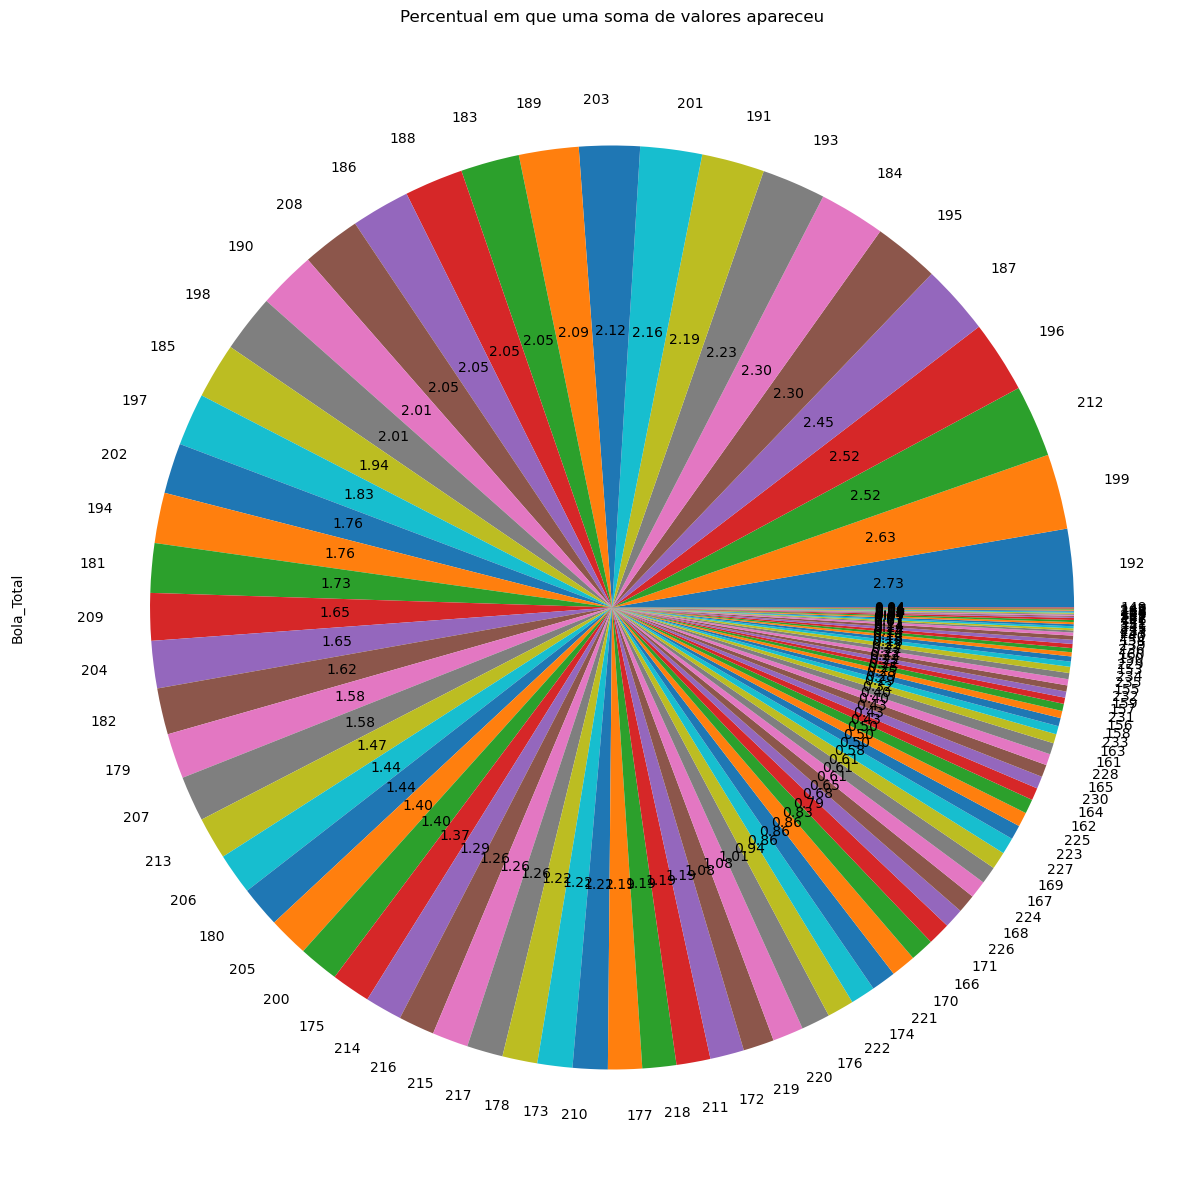

In [21]:
df_jogos['Bola_Total'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(15,15)).set_title('Percentual em que uma soma de valores apareceu')

In [22]:
df_jogos.drop('Bola_Total',
  axis='columns', inplace=True)

In [23]:
numbers = dict()
for i in range(1,26):
    numbers[i] = 0
    
print(numbers)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0}


In [24]:
def count_balls(row):
    for _, v in enumerate(row):
        numbers[v] += 1;

In [25]:
df_jogos.apply(lambda x: count_balls(x), axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
2775    None
2776    None
2777    None
2778    None
2779    None
Length: 2780, dtype: object

In [26]:
total = 0
odd_numbers = 0
even_numbers = 0

for n, count in zip(numbers.keys(), numbers.values()):
    total += count
    if n%2 != 0:
        odd_numbers += count
    else:
        even_numbers += count

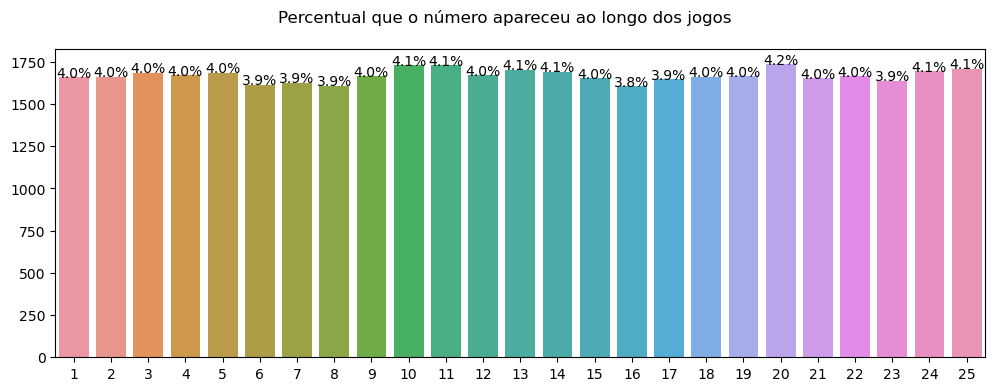

In [27]:
percentages = [(n / total) * 100 for n in numbers.values()]

fig, _ = plt.subplots(figsize=(12,4))

fig.suptitle('Percentual que o número apareceu ao longo dos jogos')
ax = sns.barplot(x=list(numbers.keys()), y=list(numbers.values()))
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percentages[i]), (x, y), ha='center')
plt.show()

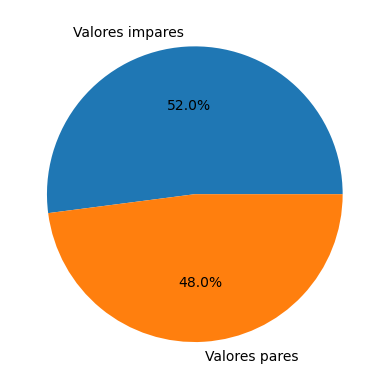

In [28]:
fig, ax = plt.subplots()

ax.pie([odd_numbers, even_numbers], labels=['Valores impares', 'Valores pares'], autopct='%1.1f%%')
plt.show()

In [29]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_jogos)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


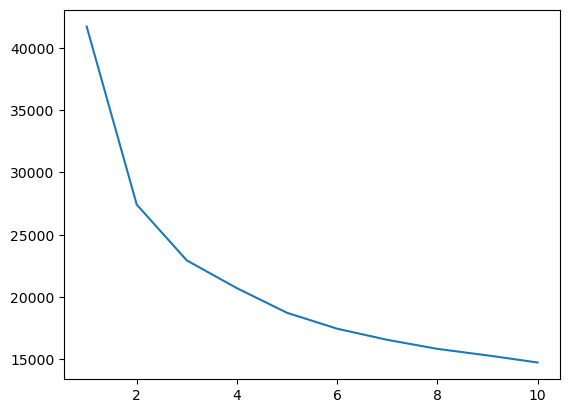

In [30]:
wcss_sc = []

for i in range(1, 11):
    clustering_sc = KMeans(n_clusters=i, random_state=42)
    clustering_sc.fit(df_scaled)
    wcss_sc.append(clustering_sc.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss_sc);

In [31]:
def generate_number(numbers):
    n = random.randrange(1, 26)
    if n in numbers:
        return generate_number(numbers)
    return n

def generate_game():
    game = []
    for i in range(1,16):
        n = generate_number(game)
        game.append(n)
    
    return game

In [32]:
df_jogos['Ganhador'] = 1
rows, _ = df_jogos.shape
for i in range(1, (rows + 1)):
    game = generate_game()
    df_jogos.loc[(rows+i)] = game + [0]  

In [33]:
df_jogos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5560 entries, 0 to 5560
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Bola_01   5560 non-null   int64
 1   Bola_02   5560 non-null   int64
 2   Bola_03   5560 non-null   int64
 3   Bola_04   5560 non-null   int64
 4   Bola_05   5560 non-null   int64
 5   Bola_06   5560 non-null   int64
 6   Bola_07   5560 non-null   int64
 7   Bola_08   5560 non-null   int64
 8   Bola_09   5560 non-null   int64
 9   Bola_10   5560 non-null   int64
 10  Bola_11   5560 non-null   int64
 11  Bola_12   5560 non-null   int64
 12  Bola_13   5560 non-null   int64
 13  Bola_14   5560 non-null   int64
 14  Bola_15   5560 non-null   int64
 15  Ganhador  5560 non-null   int64
dtypes: int64(16)
memory usage: 738.4 KB


In [63]:
df_jogos.sample(frac = 1)
df_jogos.groupby('Ganhador')['Bola_01'].count()

Ganhador
0    2780
1    2780
Name: Bola_01, dtype: int64

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import ExtraTreesClassifier

In [65]:
df_scaled = scaler.fit_transform(df_jogos[[f'Bola_{str(c).zfill(2)}' for c in range(1,16)]])

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
   df_scaled, df_jogos['Ganhador'].values, test_size=0.2, random_state=42
)

### KNN

In [67]:
count, _ = df_jogos.shape
n_k = round(math.log(count, 10))
n_k

4

In [68]:
def show_model_results(test_data, pred_data, labels):
    cm = confusion_matrix(test_data, pred_data, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    ac = accuracy_score(test_data, pred_data)
    pr = precision_score(test_data, pred_data)
    rc = recall_score(test_data, pred_data)
    
    print(f'Accuracy:  {round(ac*100, 2)}%')
    print(f'Precision: {round(pr*100, 2)}%')
    print(f'Recall:    {round(ac*100, 2)}%')
    
    disp.plot()
    plt.show()

In [69]:
def plot_roc_curve(test_data, pred_data):
    fpr, tpr, _ = roc_curve(test_data,  pred_data)
    auc = roc_auc_score(test_data, pred_data)
    
    #create ROC curve
    plt.plot(fpr,tpr,label=f'AUC={str(round(auc, 2))}')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

In [70]:
neigh = KNeighborsClassifier(n_neighbors=n_k)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

Accuracy:  99.91%
Precision: 99.82%
Recall:    99.91%


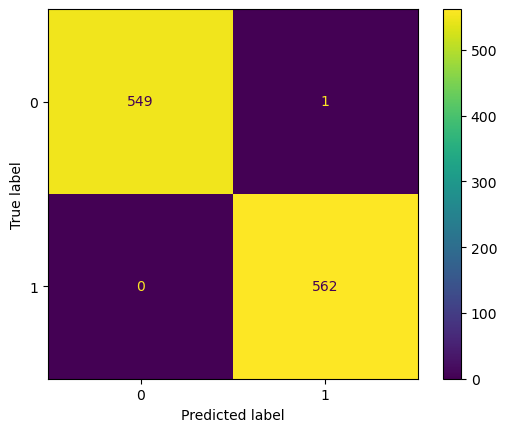

In [71]:
show_model_results(y_test, y_pred, neigh.classes_)

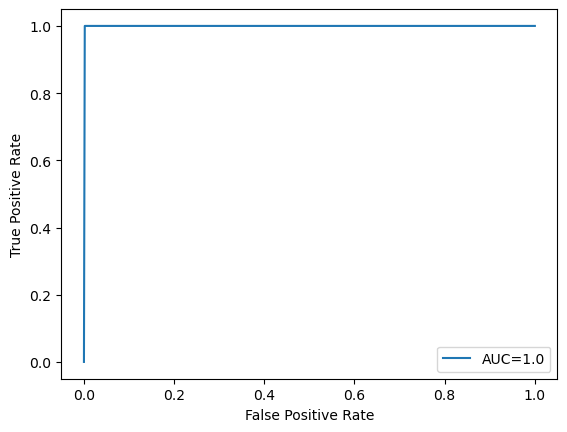

In [72]:
plot_roc_curve(y_test, y_pred)

### LogisticRegression

In [74]:
log_regression = LogisticRegression()

In [75]:
log_regression.fit(X_train,y_train)
y_pred = log_regression.predict(X_test)

Accuracy:  99.91%
Precision: 99.82%
Recall:    99.91%


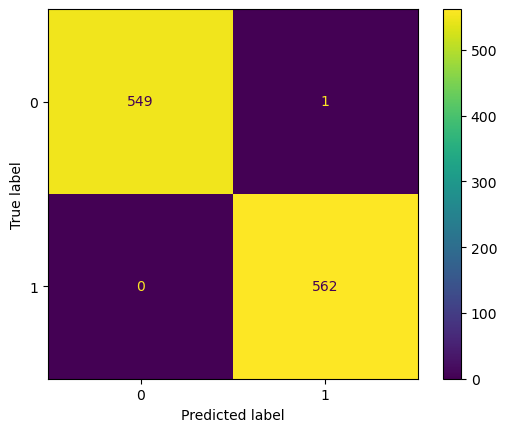

In [76]:
show_model_results(y_test, y_pred, log_regression.classes_)

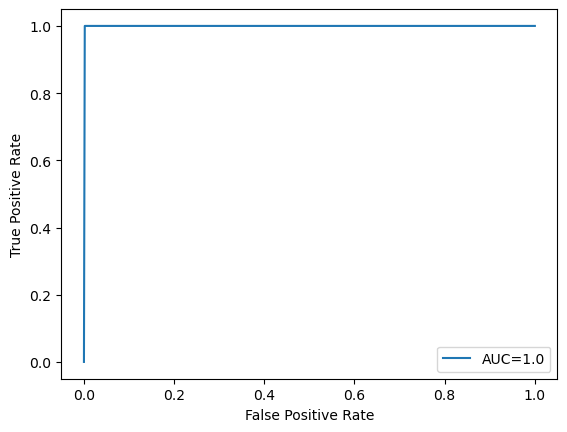

In [77]:
plot_roc_curve(y_test, y_pred)

### ExtraTreesClassifier

In [87]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Accuracy:  100.0%
Precision: 100.0%
Recall:    100.0%


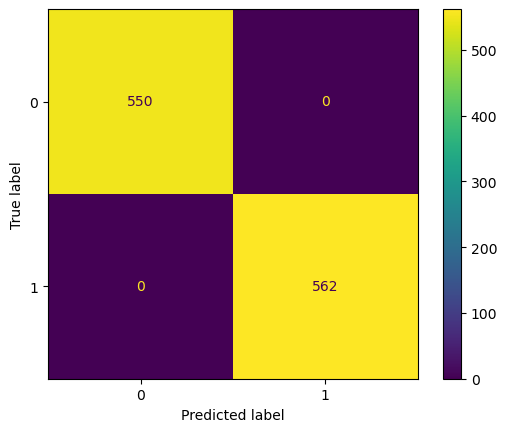

In [88]:
show_model_results(y_test, y_pred, clf.classes_)

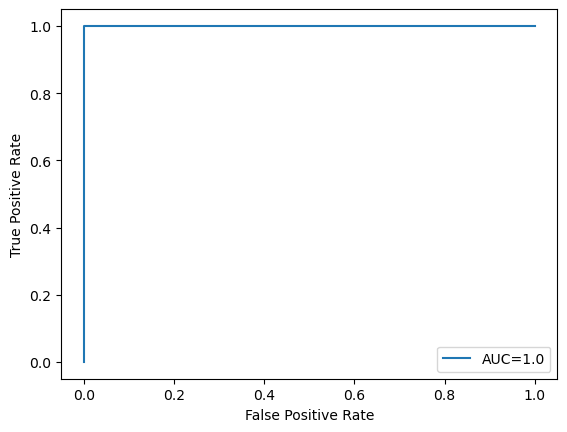

In [89]:
plot_roc_curve(y_test, y_pred)

### MLPClassifier

In [92]:
mpc = MLPClassifier(random_state=42, max_iter=50)
mpc.fit(X_train, y_train)
y_pred = mpc.predict(X_test)

Accuracy:  100.0%
Precision: 100.0%
Recall:    100.0%


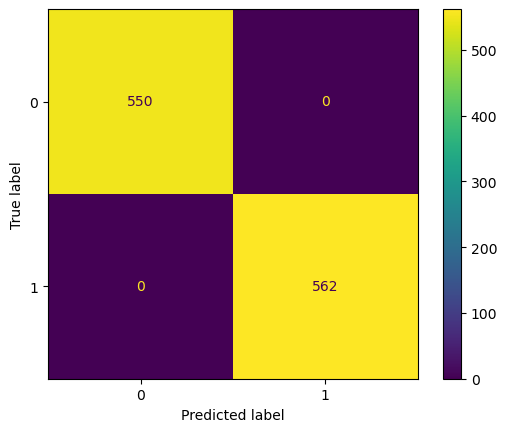

In [93]:
show_model_results(y_test, y_pred, mpc.classes_)

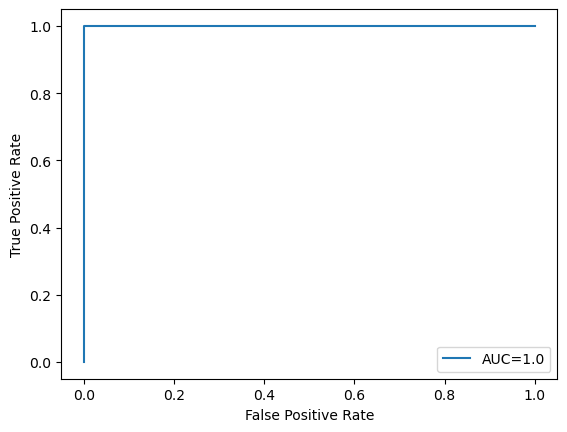

In [94]:
plot_roc_curve(y_test, y_pred)

### Neural Network

In [95]:
model = Sequential()
model.add(Dense(15, activation='relu', input_shape=(15,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [96]:
model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=0)

In [97]:
y_pred = model.predict(X_test)

35/35 [==============================] - 0s 2ms/step


In [101]:
s1 = accuracy_score(y_test, y_pred).round(3)
s2 = precision_score(y_test, y_pred, average='weighted').round(3)
s3 = recall_score(y_test, y_pred, average='weighted').round(3)
print(f'Accuracy: {round(s1*100, 2)}')
print(f'Precision: {round(s2*100, 2)}')
print(f'Recall: {round(s3*100, 2)}')

Accuracy: 50.5
Precision: 25.5
Recall: 50.5


### Concurso 2794
01 02 03 05 06 08 10 14 15 16 17 20 21 22 25

In [103]:
df_winner = pd.DataFrame(data={
    'Bola_01': [1],
    'Bola_02': [2],
    'Bola_03': [3],
    'Bola_04': [5],
    'Bola_05': [6],
    'Bola_06': [8],
    'Bola_07': [10],
    'Bola_08': [14],
    'Bola_09': [15],
    'Bola_10': [16],
    'Bola_11': [17],
    'Bola_12': [20],
    'Bola_13': [21],
    'Bola_14': [22],
    'Bola_15': [25]
})
df_w_scaled = scaler.fit_transform(df_winner)
df_winner['Ganhador'] = 1

In [108]:
w_test = list(df_winner['Ganhador'].values)
w_test

[1]

Accuracy:  100.0%
Precision: 100.0%
Recall:    100.0%


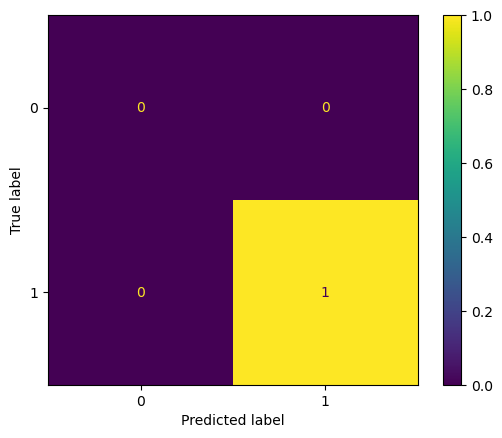

In [109]:
y_pred = neigh.predict(df_w_scaled)
show_model_results([w_test], y_pred, neigh.classes_)

Accuracy:  0.0%
Precision: 0.0%
Recall:    0.0%


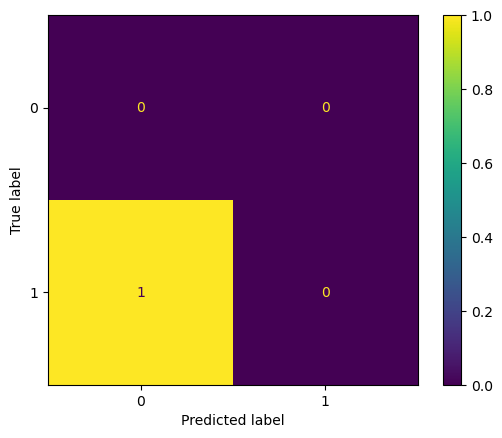

In [111]:
y_pred = log_regression.predict(df_w_scaled)
show_model_results([w_test], y_pred, log_regression.classes_)

Accuracy:  0.0%
Precision: 0.0%
Recall:    0.0%


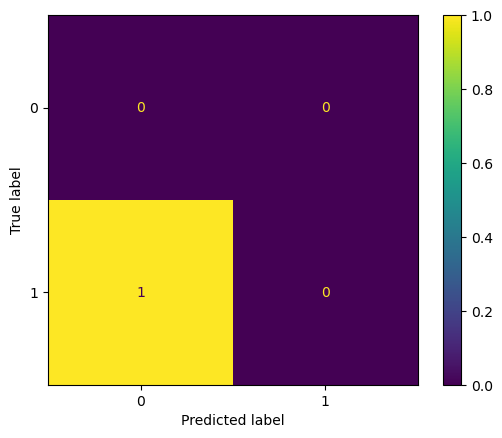

In [112]:
y_pred = clf.predict(df_w_scaled)
show_model_results([w_test], y_pred, clf.classes_)

Accuracy:  0.0%
Precision: 0.0%
Recall:    0.0%


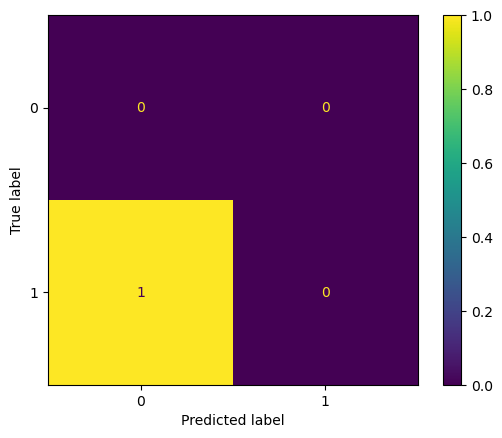

In [114]:
y_pred = mpc.predict(df_w_scaled)
show_model_results([w_test], y_pred, mpc.classes_)